In [1]:
import nbsetup
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from models.equations import velocity
from models.sparc.profile import generate_profiles
from models.sparc.galaxy import generate_galaxy
from models.sparc.result import Result
from models.space import Space
from models.galaxy import Galaxy

In [2]:
profiles = generate_profiles()

In [26]:
def masses_function(self, space, zh, legacy=False):
    """ Generates the mass profiles for a given space object """
    if legacy:
        dc = self._decomps()
        r, z = space.rz()
    
        # need to adjust for scale
        # as density is in pc2
        # we need kpc and account for scaling
        scale = ((1000*space.scale)**2)
        
        masses = []
        for label, decomp in dc.items():
            R, data = decomp
            # interp raw sparc data
            # that data doesn't smooth
            # if donut left=0, right=0
            # decomp[0] is the standard, no 
            m = np.interp(r, R, data)*scale
            masses.append(m)
        return np.array(masses), list(dc.keys()) 
    else:
    
        dc = self._decomps()
        r, z = space.rz()
        
        # need to adjust for scale
        # as density is in pc2
        # we need kpc and account for scaling
        scale = (1000*space.scale)**2
        
        masses = []
        for label, decomp in dc.items():
            R, data = decomp
            # interp raw sparc data
            # that data doesn't smooth
            # if donut left=0, right=0
            # decomp[0] is the standard, no 
            
            if label == 'disk':
                # z to project
                # scale as standard
                # space scale as now 3d
                m = np.interp(r, R, data)*scale*np.exp(-z/zh)*space.scale
                masses.append(m)
            elif label == 'gas':
                # do not project gas
                m = space.blank()
                m[space.center[0]] = np.interp(r[0], R, data)*scale
                masses.append(m)
            
        return np.array(masses), list(dc.keys()) 

In [27]:
masses_function(profiles['F571-8'], Space((5,5,3)), 1, legacy=False)[0][1]

array([[[      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ]],

       [[      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ],
        [      0.        ,       0.        ,       0.        ]],

       [[4121055.81462514, 4274500.        , 4121055.81462514],
        [4655261.18445749, 5046000.        , 4655261.18445749],
        [5046000.        , 5980000.        , 5046000.        ],
        [4655261.18445749, 5046000.        , 4655261.18445749],
        [4121055.81462514, 4274500.        , 4121055.81462514]],

       [[      0.        ,       0

In [28]:
disks = ['F571-8', 'NGC0024'],
gases = ['F574-2', 'IC2574']
buls = ['IC4202', 'NGC0891']

In [32]:
def gen_galaxies(space_points=200, legacy=False, zcut=2, zh=0.00134948):
    simulations = {}
    for uid, profile in profiles.items():
        if uid in gases:
            z = 1 if legacy else space_points//zcut
            space = Space((z,space_points,space_points), profile.max_r*4/space_points)
            masses, labels = masses_function(profile, space, zh, legacy)
            
            sim = Galaxy(masses, space, mass_labels=labels, cp=nbsetup.cp)
            sim.profile = profile
            sim.name = profile.uid
            
            sim.analyse(profile.rotmass_points(space))
            simulations[profile.uid] = sim
    return simulations


In [33]:
small = Result(simulations=gen_galaxies(100, zcut=1, zh=0.53))
small.plot_velocities(profiles=True, sharex=False)

completed in 1.01 seconds


ValueError: Length of values (25) does not match length of index (34)

In [ ]:
small = Result(simulations=gen_galaxies(200, zh=0.00048693))
small.plot_velocities(profiles=True, sharex=False)

completed in 0.06 seconds


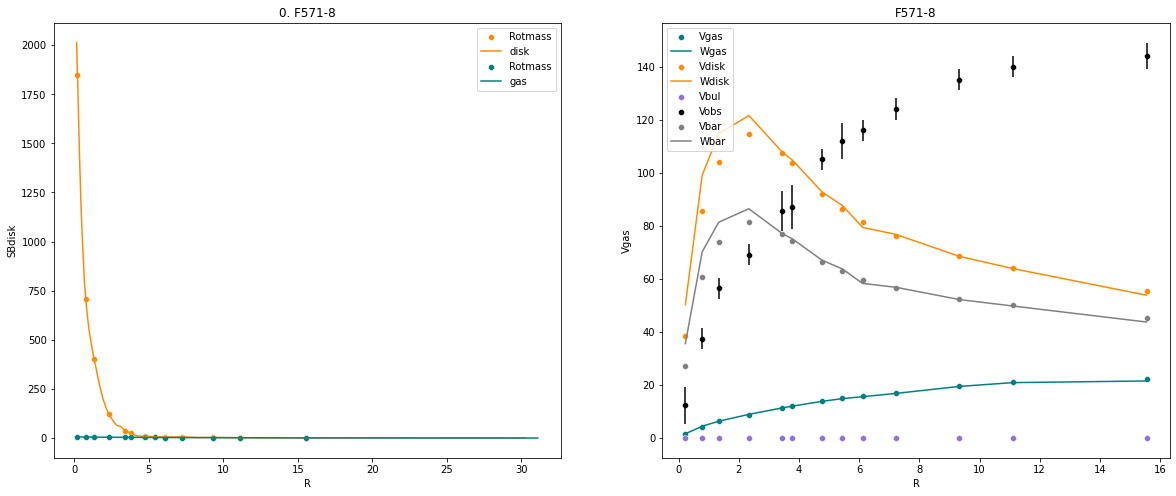

In [115]:
small = Result(simulations=gen_galaxies(200, legacy=True))
small.plot_velocities(profiles=True, sharex=False)

In [112]:
gen_galaxies()

completed in 1.38 seconds


{'CamB': <models.galaxy.Galaxy at 0x7f8bd4169ca0>}

In [176]:
masses_function(small.simulations['CamB'].profile, small.simulations['CamB'].space)[0][1][50].sum(axis=1)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

completed in 2.01 seconds


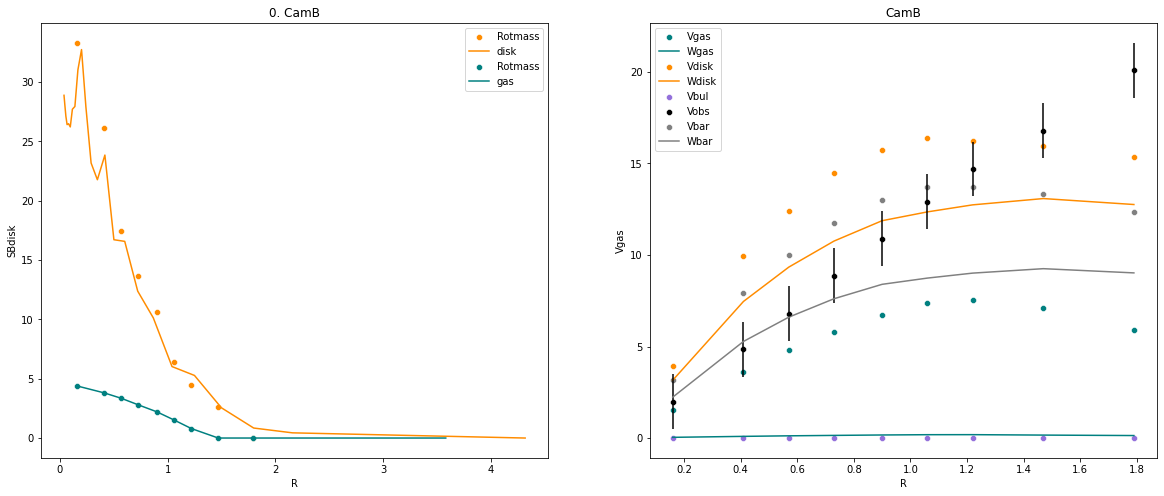

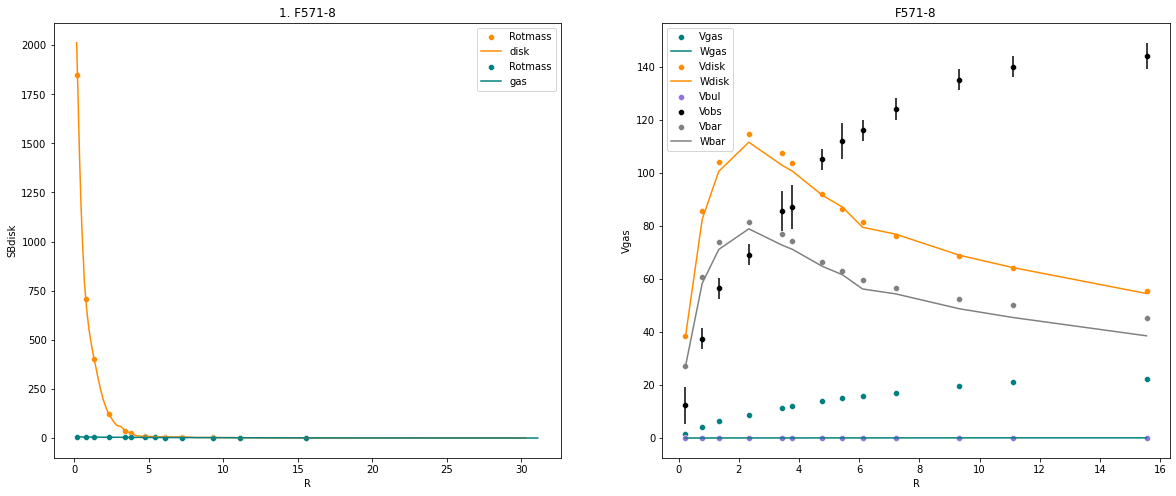

In [162]:
small = Result(simulations=gen_galaxies(200, zcut=2))
small.plot_velocities(profiles=True, sharex=False)

In [118]:
#legacy = Result(simulations=gen_galaxies(legacy=True))
small = Result(simulations=gen_galaxies())
#large = Result(simulations=gen_galaxies(300))
#long = Result(simulations=gen_galaxies(200, zcut=1))

completed in 9.24 seconds


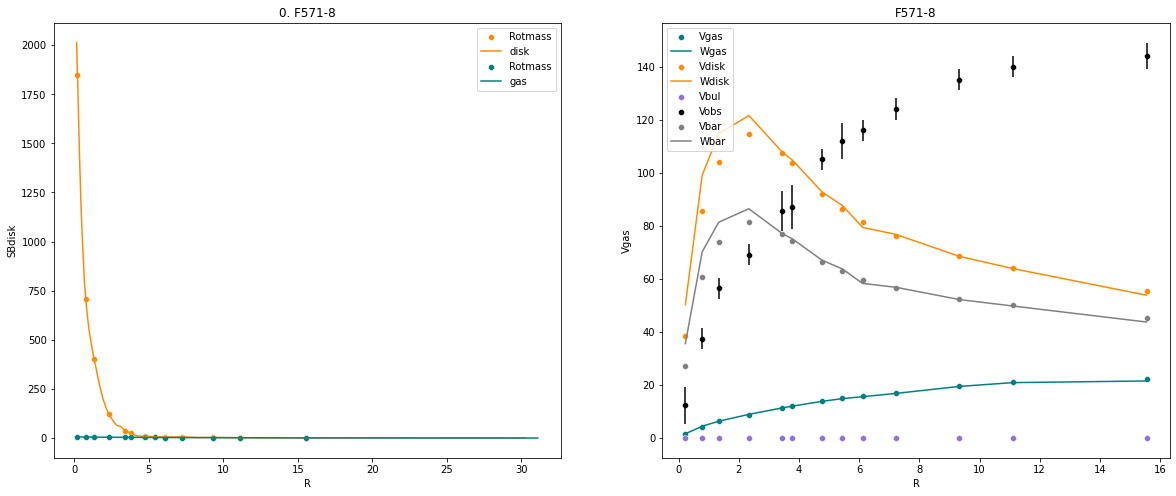

In [119]:
#legacy.plot_velocities(profiles=True, sharex=False)

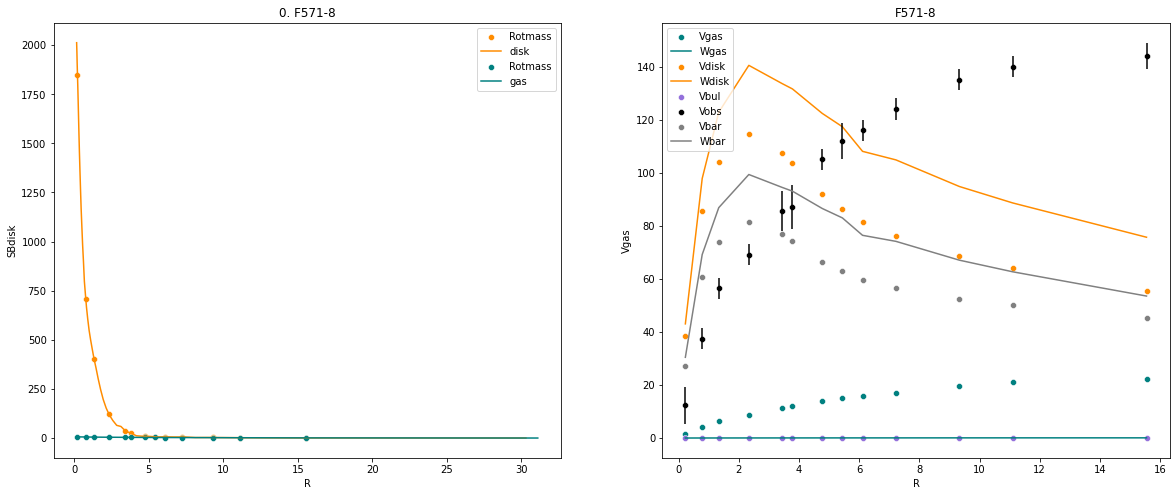

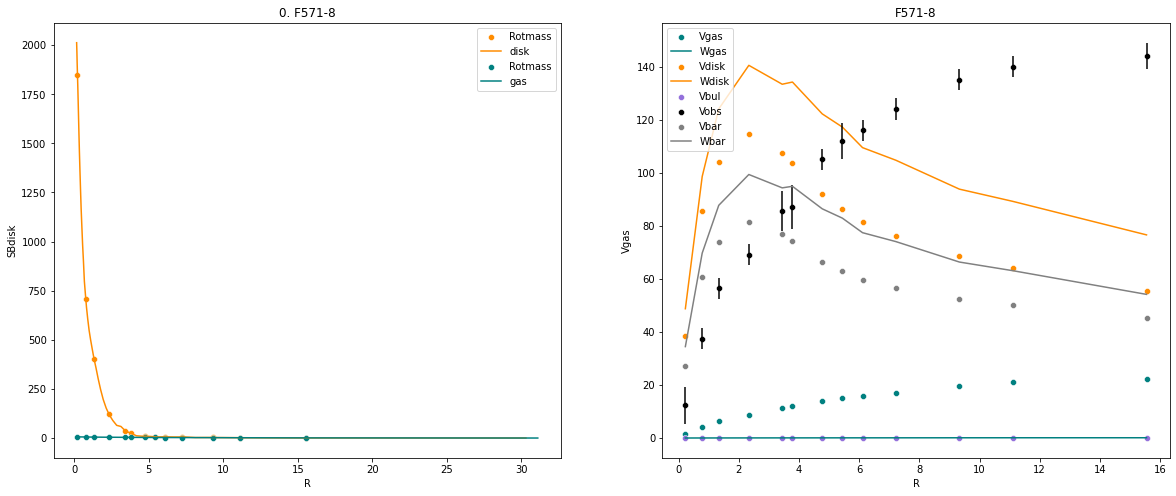

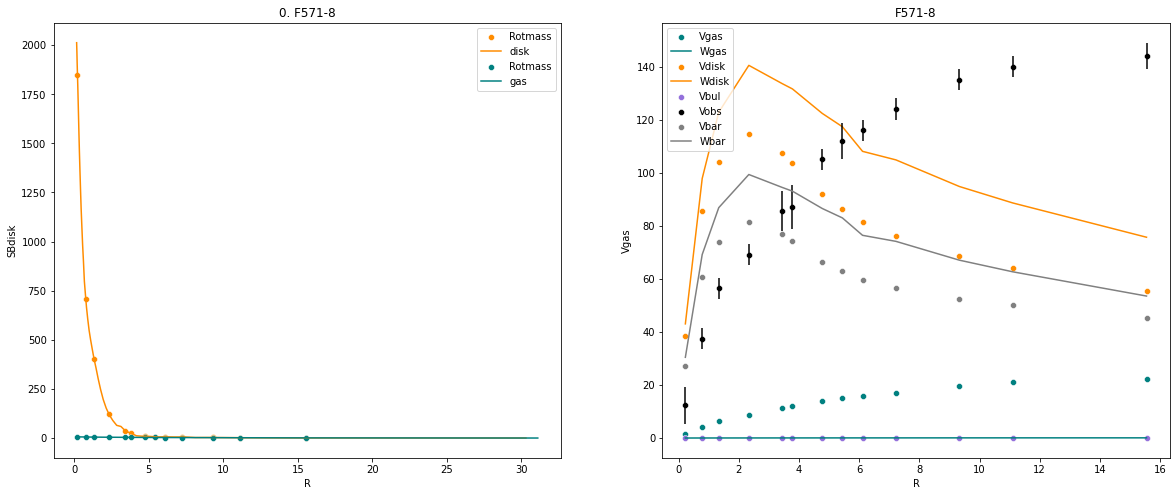

In [121]:
for result in (small, large, long):
    result.plot_velocities(profiles=True, sharex=False)

In [120]:
def correct(r):
    r.dataframe['Wdisk'] = r.dataframe['Wdisk']
    return r